## 感知机

> 9211080N0242 王杰

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

数据读取

In [2]:
data_x=pd.read_csv('./ex4x.dat',header=None,sep=r'\s+')
print(data_x)
data_y=pd.read_csv('./ex4y.dat',header=None,sep=r'\s+')
print(data_y)

       0     1
0   55.5  69.5
1   41.0  81.5
2   53.5  86.0
3   46.0  84.0
4   41.0  73.5
..   ...   ...
75  20.0  65.5
76  38.0  65.0
77  18.5  74.5
78  16.0  72.5
79  33.5  68.0

[80 rows x 2 columns]
      0
0   1.0
1   1.0
2   1.0
3   1.0
4   1.0
..  ...
75  0.0
76  0.0
77  0.0
78  0.0
79  0.0

[80 rows x 1 columns]


数据载入

In [3]:
x1=data_x[0].values.tolist()
x1
x2=data_x[1].values.tolist()
x2
y=data_y[0].values.tolist()
X1=np.array(x1)
X1=X1.reshape(len(X1),1)
X2=np.array(x2)
X2=X2.reshape(len(X2),1)
X=np.column_stack((X1,X2))
Y=np.array(y)
Y=Y.reshape(len(Y),1)
print('{},{}'.format(X.shape,Y.shape))

(80, 2),(80, 1)


数据集分割

In [4]:
def split_dataset(data_set,train_set_size):
    sample_num,feature_num=data_set.shape
    train_set=data_set[:min(sample_num,train_set_size),:]
    test_set=data_set[min(sample_num,train_set_size):,:]
    return train_set,test_set

数据集标准化

In [5]:
def normalize_dataset(data_set):
    data_set_norm=[]
    for row in data_set.T:
        mean=np.mean(row)
        # print("mean:{}".format(mean))
        std=np.std(row)
        # print("std:{}".format(std)) 
        row=(row-mean)/std
        data_set_norm.append(row)
        
    return np.array(data_set_norm).T

### 接下来使用逻辑回归进行随机梯度下降

sigmoid函数

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Logistic regression loss 函数

In [7]:
def logistic_loss(X, Y, theta):
    prediction = sigmoid(X @ theta)
    part1 = Y * np.log2(prediction)
    part2 = (1 - Y) * np.log2(1 - prediction)
    return -np.sum(part1 + part2) / len(Y)

Logistic regression gradient 函数

In [8]:
def logistic_g(X, Y, theta):
    sample_num = X.shape[0]
    gradient = X.T @ (sigmoid(X @ theta) - Y) / sample_num
    return gradient

批量SGD 函数

In [9]:
def stochastic_gradient_descent(X, Y, learning_rate, max_epoch, batch=1,decay=0.01):
    '''
        X:features
        Y:labels
        max_epoch:迭代次数
        batch:每次迭代的样本数量
        decay:学习率衰减因子
    '''
    loss_history = []
    theta = np.zeros((X.shape[1], 1))
    lr=learning_rate
    for i in range(max_epoch):
        X_selected = []  # 随机样本矩阵
        Y_selected = []
        for j in range(batch):
            rand_index = np.random.randint(X.shape[0])  # 随机生成样本下标
            X_selected.append(X[rand_index, :])
            Y_selected.append(Y[rand_index, :])
        
        X_selected=np.array(X_selected) #生成的随机样本矩阵
        Y_selected=np.array(Y_selected)
        
        # lr=learning_rate*1.0/(1.0+decay*i) # 学习率衰减
        
        gd = logistic_g(X_selected, Y_selected, theta)  # 求解梯度
        theta = theta - lr * gd  # 更新参数
        
        cost = logistic_loss(X, Y, theta)
        loss_history.append(cost)

    return theta, loss_history

Logistic 分类函数

In [10]:
def logistic_classify(Y,threshold=0.5):
    '''
    Y:prediction
    threshold:区分阈值
    '''
    res=np.zeros_like(Y)
    res[Y>=threshold]=1
    return res

Logistic 准确率函数

In [11]:
def logistic_accuracy(Y_cls,Y):
    return (Y_cls==Y).mean()

#### 接下来进行逻辑回归

In [12]:
train_set_size=80
X_train_set,X_test_set=split_dataset(X,train_set_size)
X_train_set_norm=normalize_dataset(X_train_set)
Y_train_set,Y_test_set=split_dataset(Y,train_set_size)

In [13]:
Xp_train_set_norm=np.column_stack((X_train_set_norm,np.ones(X_train_set_norm.shape[0])))
sgd_theta,sgd_loss_history=stochastic_gradient_descent(Xp_train_set_norm,Y_train_set,0.1,5000,32,decay=0.01)
print(sgd_theta)
print("Min_loss:{}".format(min(sgd_loss_history)))

[[1.4960904 ]
 [1.55007806]
 [0.00248338]]
Min_loss:0.5849374024345548


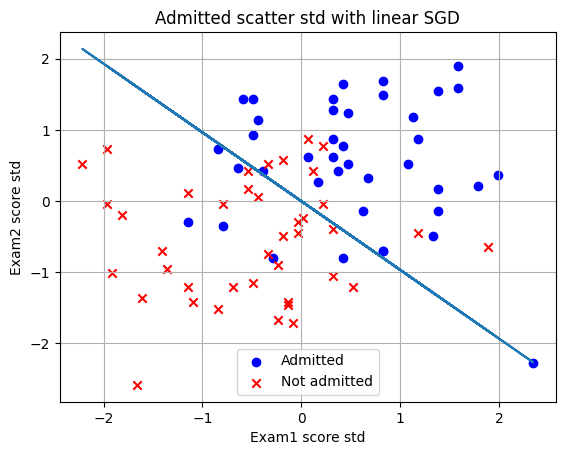

In [14]:
x1_norm=Xp_train_set_norm[:,0].reshape(-1,1) # 取出列向量
x2_norm=Xp_train_set_norm[:,1].reshape(-1,1)
pic_x2=-(sgd_theta[0,0]/sgd_theta[1,0])*x1_norm-(sgd_theta[2,0]/sgd_theta[1,0])
plt.title("Admitted scatter std with linear SGD"),
plt.xlabel("Exam1 score std")
plt.ylabel("Exam2 score std")
plt.scatter(x1_norm[Y_train_set==1],x2_norm[Y_train_set==1],c='blue',marker='o',label='Admitted')
plt.scatter(x1_norm[Y_train_set==0],x2_norm[Y_train_set==0],c='red',marker='x',label='Not admitted')
plt.plot(x1_norm,pic_x2)
plt.legend()
plt.grid()
plt.show()

以上为通过随机梯度下降的逻辑回归获得的结果

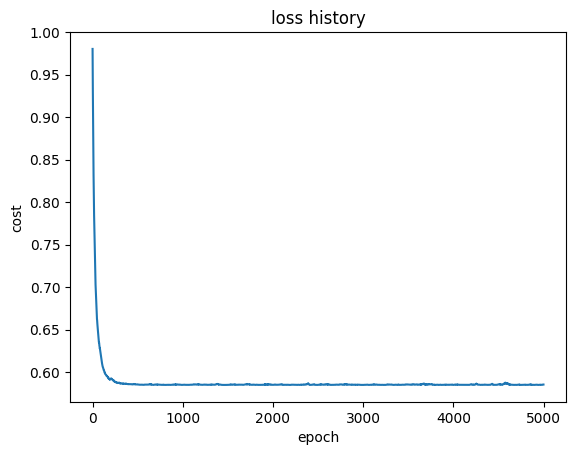

In [15]:
plt.plot(sgd_loss_history)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.title('loss history')
plt.show()

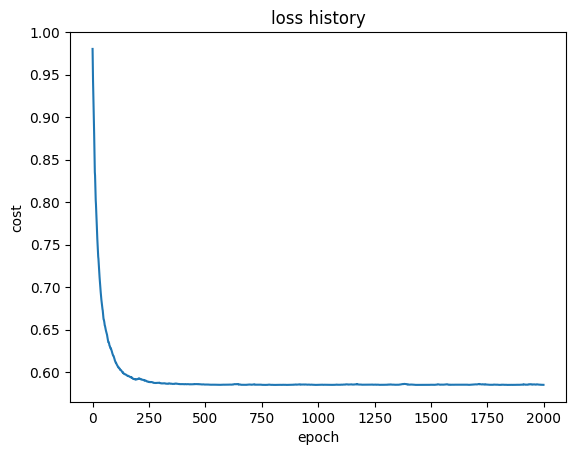

In [16]:
plt.plot(sgd_loss_history[:2000])
plt.xlabel('epoch')
plt.ylabel('cost')
plt.title('loss history')
plt.show()

以上为随迭代次数，loss的变化

### 接下来进行感知机算法

感知机损失函数

In [17]:
def percept_loss(X,Y,theta):
    prediciton=X @ theta
    loss=-np.sum(Y * prediciton)
    return loss

感知机学习函数

由于该数据明显为线性不可分数据，所以使用普通感知机时无法迭代到无错误分类点的情况，为此，选取损失函数值最小时为最优解

In [18]:
def percept_train(X, Y, learning_rate, max_epoch):
    sample_size, feature_size = X.shape
    theta = np.zeros((feature_size, Y.shape[1]))
    epoch = 0
    loss_history = []
    theta_history=[]
    while epoch < max_epoch:
        for i in range(sample_size):
            sampleX=np.array(X[i]).reshape(1,-1)
            sampleY=np.array(Y[i])[0]
            if ((sampleX @ theta) * sampleY)[0] <= 0:
                theta = theta + learning_rate * (sampleX.T * sampleY)
                epoch += 1
                loss = percept_loss(X, Y, theta)
                loss_history.append(loss) # 记录损失值
                theta_history.append(theta) # 记录权重值
                if epoch > max_epoch:
                    break
        
    return np.array(theta_history),np.array(loss_history)

In [19]:
def percept_lable_pre(label_data_set):
    return np.where(label_data_set==0,-1,label_data_set)

In [20]:
pre_Y_train_set=percept_lable_pre(Y_train_set)
percept_theta_history,percept_loss_history=percept_train(Xp_train_set_norm,pre_Y_train_set,0.1,1000)
min_index=np.argmin(percept_loss_history)
print("min_index:{}".format(min_index))
percept_theta=percept_theta_history[min_index]
percept_theta

min_index:249


array([[ 5.07046196e-01],
       [ 2.90176457e-01],
       [-2.77555756e-17]])

In [21]:
print("minloss:{}".format(percept_loss_history[min_index]))


minloss:-33.45398373764601


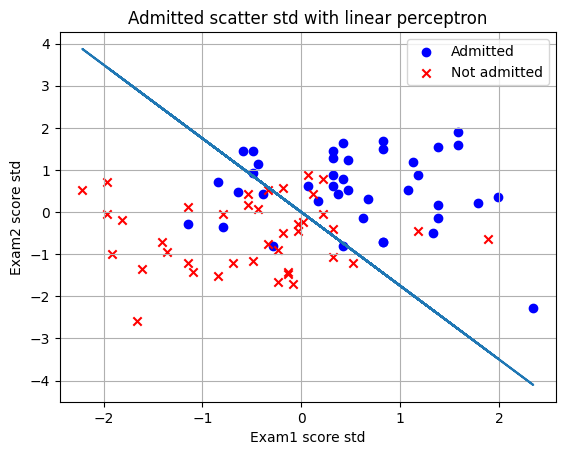

In [22]:
x1_norm=Xp_train_set_norm[:,0].reshape(-1,1) # 取出列向量
x2_norm=Xp_train_set_norm[:,1].reshape(-1,1)
pic_x2=-(percept_theta[0,0]/percept_theta[1,0])*x1_norm-(percept_theta[2,0]/percept_theta[1,0])
plt.title("Admitted scatter std with linear perceptron"),
plt.xlabel("Exam1 score std")
plt.ylabel("Exam2 score std")
plt.scatter(x1_norm[Y_train_set==1],x2_norm[Y_train_set==1],c='blue',marker='o',label='Admitted')
plt.scatter(x1_norm[Y_train_set==0],x2_norm[Y_train_set==0],c='red',marker='x',label='Not admitted')
plt.plot(x1_norm,pic_x2)
plt.legend()
plt.grid()
plt.show()

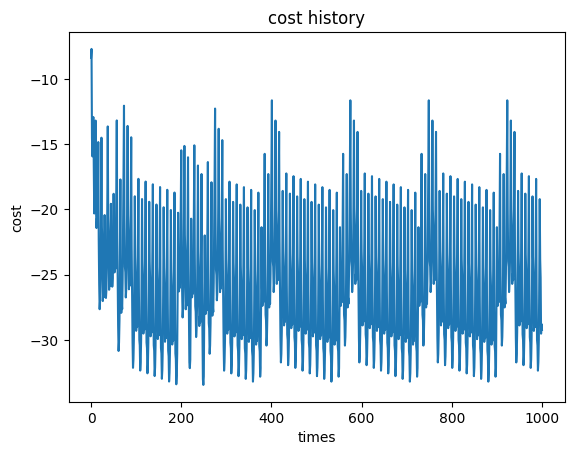

In [23]:
plt.plot(percept_loss_history)
plt.xlabel('times')
plt.ylabel('cost')
plt.title('cost history')
plt.show()

发现损失函数的出现有一定的规律性，取出其中包含最小loss的一部分进行观察

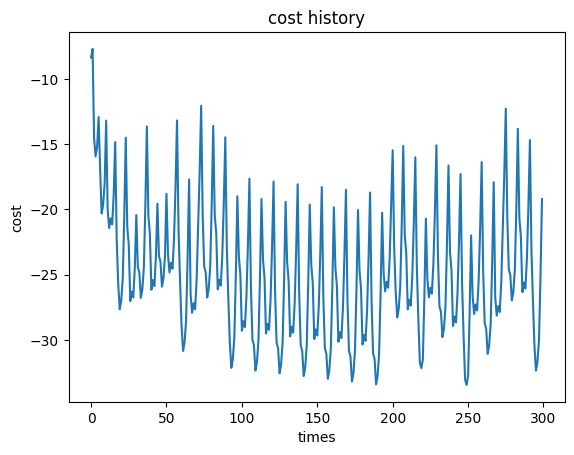

In [24]:
plt.plot(percept_loss_history[:300])
plt.xlabel('times')
plt.ylabel('cost')
plt.title('cost history')
plt.show()

接下来对logistc回归与感知机模型的结果进行比较

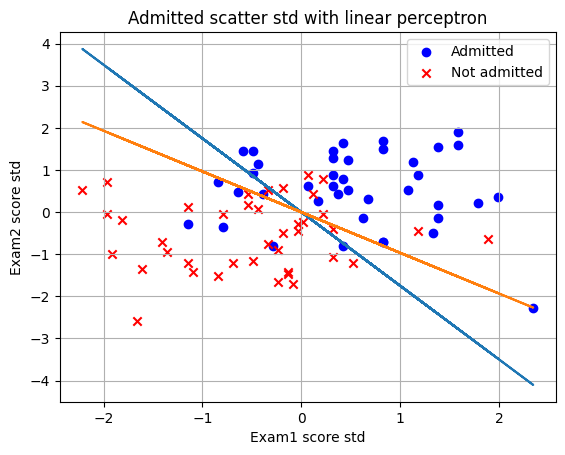

In [25]:
x1_norm=Xp_train_set_norm[:,0].reshape(-1,1) # 取出列向量
x2_norm=Xp_train_set_norm[:,1].reshape(-1,1)
pic_x_percept=-(percept_theta[0,0]/percept_theta[1,0])*x1_norm-(percept_theta[2,0]/percept_theta[1,0])
pic_x_logitstc=-(sgd_theta[0,0]/sgd_theta[1,0])*x1_norm-(sgd_theta[2,0]/sgd_theta[1,0])
plt.title("Admitted scatter std with linear perceptron"),
plt.xlabel("Exam1 score std")
plt.ylabel("Exam2 score std")
plt.scatter(x1_norm[Y_train_set==1],x2_norm[Y_train_set==1],c='blue',marker='o',label='Admitted')
plt.scatter(x1_norm[Y_train_set==0],x2_norm[Y_train_set==0],c='red',marker='x',label='Not admitted')
plt.plot(x1_norm,pic_x_percept)
plt.plot(x1_norm,pic_x_logitstc,'-')
plt.legend()
plt.grid()
plt.show()

其中橘色为逻辑回归的结果，蓝色为感知机的结果，由于该训练集为非线性可分的数据集，因此感知机模型并不能很好的将其分开